<a href="https://colab.research.google.com/github/ULabanieh/Utrecht-Housing-Price-Predictor/blob/main/cla_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Utrecht Housing Price Predictor

In [2]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The goal of the project is to explore how well housing prices can be predicted based on property characteristics and to build a clear end-to-end machine learning pipeline, from data exploration and preprocessing to model training and evaluation.

In [3]:
# Install libraries and dependancies for project
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn
!pip install torch

In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import torch

In [5]:
# fix for scientific notation
pd.set_option("display.float_format", "{:,.0f}".format)

In [6]:
# setting random seeds for reproducibility
SEED = 42

random.seed(SEED)
np.random.seed(SEED)

In [7]:
# establishing working directory
import os
os.chdir("/content/drive/MyDrive/Final Project/data")


Importing dataset from csv

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Final Project/data/utrechthousinghuge.csv')
df

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
0,100426,3528,11,5,56,112,10,2,2112,5113,1932,1,494000,670000,0,1
1,100871,3528,14,5,68,112,8,0,2355,5218,1945,1,504000,675000,0,1
2,100936,3800,17,7,111,151,44,2,2656,5200,1946,1,692000,869000,0,1
3,100970,3800,19,6,112,108,40,2,2856,5201,1946,1,521000,628000,0,1
4,101191,3800,20,6,118,108,46,1,2962,5266,1950,1,526000,610000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,993057,3525,12,8,99,142,20,2,2252,5752,1990,2,648000,765000,1,0
1996,993131,3500,16,8,124,135,34,2,2650,5768,1992,1,639000,728000,0,0
1997,993444,3525,12,6,78,146,20,2,2204,5854,2000,2,647000,733000,1,0
1998,993873,3525,14,8,103,137,27,1,2352,5958,2015,2,629000,694000,1,0


In [9]:
df.shape

(2000, 16)

In [10]:
df.head()

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
0,100426,3528,11,5,56,112,10,2,2112,5113,1932,1,494000,670000,0,1
1,100871,3528,14,5,68,112,8,0,2355,5218,1945,1,504000,675000,0,1
2,100936,3800,17,7,111,151,44,2,2656,5200,1946,1,692000,869000,0,1
3,100970,3800,19,6,112,108,40,2,2856,5201,1946,1,521000,628000,0,1
4,101191,3800,20,6,118,108,46,1,2962,5266,1950,1,526000,610000,0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2000 non-null   int64  
 1   zipcode      2000 non-null   int64  
 2   lot-len      2000 non-null   float64
 3   lot-width    2000 non-null   float64
 4   lot-area     2000 non-null   float64
 5   house-area   2000 non-null   float64
 6   garden-size  2000 non-null   float64
 7   balcony      2000 non-null   int64  
 8   x-coor       2000 non-null   int64  
 9   y-coor       2000 non-null   int64  
 10  buildyear    2000 non-null   int64  
 11  bathrooms    2000 non-null   int64  
 12  taxvalue     2000 non-null   int64  
 13  retailvalue  2000 non-null   int64  
 14  energy-eff   2000 non-null   int64  
 15  monument     2000 non-null   int64  
dtypes: float64(5), int64(11)
memory usage: 250.1 KB


In [12]:
# duplicate check
df.nunique()

,0
id,1999
zipcode,4
lot-len,60
lot-width,61
lot-area,870
house-area,157
garden-size,652
balcony,3
x-coor,396
y-coor,398


In [13]:
print(df.duplicated().sum())

0


In [14]:
print(df['id'].duplicated().sum())

1


In [15]:
df[df['id'].duplicated(keep = False)]

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
947,531909,3800,15,9,137,202,47,2,2517,5467,1965,1,919000,1142000,0,1
948,531909,3800,15,8,122,109,49,2,2505,5462,1969,1,535000,693000,0,0


In [16]:
df[df.duplicated()]
# no duplicate records in this dataset

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument


In [17]:
df.columns

Index(['id', 'zipcode', 'lot-len', 'lot-width', 'lot-area', 'house-area',
       'garden-size', 'balcony', 'x-coor', 'y-coor', 'buildyear', 'bathrooms',
       'taxvalue', 'retailvalue', 'energy-eff', 'monument'],
      dtype='object')

In [18]:
df['garden-size'].unique()

array([ 10.5,   8. ,  44.2,  39.6,  45.6,  48.4,  68.3,  85.5,   9.3,
        68.5,  89. ,  32.4,  83.3,   6.6,  11.9,  17.4,  48.9,   8.9,
        60.7,  55.6,  51. ,  20.3,  29.7,   5.1,  21. ,  70. ,  15.8,
        56.1,  44.7,  10.1,  14.6,  29.1,  77. ,  24.7,  43.4,   8.5,
        65.5,  14.3,  75.8,  20.2,   5.7,  30.4,  46.4,  26.2,  79.2,
         9.2,  96.6,  41.4,  17.8,  40.8,  38.9,   6.2,   9.1,   7.5,
        82.1,   8.8,  10.6,  12.4,  19.2,  23.1,  20. ,  83.4,  30.6,
         7.7,  20.5,  11.1,  50.9,   5.6,  27. ,  64.3,  35.2,  31.8,
        44.8,   8.7,  99.6,  10.3,  73.6,  64. ,  29. ,  57.5,  67.7,
        69.8,  25.5,  47.1,  45.4,  36.5,   7. ,  24. ,  23.4,  23. ,
        53. ,   5.2,  24.3,  15.9,  29.2,  47.8,  60.8,  73. ,  44. ,
        79.8,  35.3,  27.5,   8.3, 108.1,  42.7,  25.7,  63.7,  19.5,
        28.1,  42.6,  34.8,  37.8,  41.8,   6.7,   6.4,  51.9,  13.1,
        74.4,   9. ,  46. ,  59.2,  45.5,   6.9,  23.8,  21.6,  39.8,
        12.8,  68. ,

In [19]:
# Comprehensive missing value check
print("MISSING VALUE ANALYSIS")

# Count missing values per column
missing_counts = df.isnull().sum()
missing_percentages = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_counts.index,
    'Missing Count': missing_counts.values,
    'Missing %': missing_percentages.values
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) == 0:
    print("\n✅ NO MISSING VALUES DETECTED")
    print(f"   Total observations: {len(df)}")
    print(f"   Total features: {len(df.columns)}")
    print(f"   Dataset completeness: 100%")
else:
    print("\n⚠️ MISSING VALUES FOUND:")
    print(missing_df.to_string(index=False))
    print(f"\n   Total affected rows: {df.isnull().any(axis=1).sum()}")

# Check data types to confirm no issues
print("\n")
print("DATA TYPE SUMMARY")
print(df.dtypes)

print("\n")
print("DATASET SHAPE")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

MISSING VALUE ANALYSIS

✅ NO MISSING VALUES DETECTED
   Total observations: 2000
   Total features: 16
   Dataset completeness: 100%


DATA TYPE SUMMARY
id               int64
zipcode          int64
lot-len        float64
lot-width      float64
lot-area       float64
house-area     float64
garden-size    float64
balcony          int64
x-coor           int64
y-coor           int64
buildyear        int64
bathrooms        int64
taxvalue         int64
retailvalue      int64
energy-eff       int64
monument         int64
dtype: object


DATASET SHAPE
Rows: 2000
Columns: 16


In [20]:
df = df.drop(['id', 'zipcode', 'lot-len', 'lot-width'], axis = 1)
df

,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
0,56,112,10,2,2112,5113,1932,1,494000,670000,0,1
1,68,112,8,0,2355,5218,1945,1,504000,675000,0,1
2,111,151,44,2,2656,5200,1946,1,692000,869000,0,1
3,112,108,40,2,2856,5201,1946,1,521000,628000,0,1
4,118,108,46,1,2962,5266,1950,1,526000,610000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,99,142,20,2,2252,5752,1990,2,648000,765000,1,0
1996,124,135,34,2,2650,5768,1992,1,639000,728000,0,0
1997,78,146,20,2,2204,5854,2000,2,647000,733000,1,0
1998,103,137,27,1,2352,5958,2015,2,629000,694000,1,0


In [21]:
df = df.rename(columns={ 'lot-area': 'lot_area', 'house-area': 'house_area', 'garden-side': 'garden_size', 'x-coor': 'x_coor', 'y-coor': 'y_coor', 'energy-eff': 'energy_eff', 'garden-size': 'garden_size', 'buildyear': 'build_year', 'taxvalue': 'tax_value', 'retailvalue': 'retail_value' })

In [22]:
df

,lot_area,house_area,garden_size,balcony,x_coor,y_coor,build_year,bathrooms,tax_value,retail_value,energy_eff,monument
0,56,112,10,2,2112,5113,1932,1,494000,670000,0,1
1,68,112,8,0,2355,5218,1945,1,504000,675000,0,1
2,111,151,44,2,2656,5200,1946,1,692000,869000,0,1
3,112,108,40,2,2856,5201,1946,1,521000,628000,0,1
4,118,108,46,1,2962,5266,1950,1,526000,610000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,99,142,20,2,2252,5752,1990,2,648000,765000,1,0
1996,124,135,34,2,2650,5768,1992,1,639000,728000,0,0
1997,78,146,20,2,2204,5854,2000,2,647000,733000,1,0
1998,103,137,27,1,2352,5958,2015,2,629000,694000,1,0


In [23]:
df.nunique()

,0
lot_area,870
house_area,157
garden_size,652
balcony,3
x_coor,396
y_coor,398
build_year,99
bathrooms,2
tax_value,682
retail_value,739


In [24]:
# verifying binary columns are truly binary
df["energy_eff"].unique()


array([0, 1])

In [25]:
df["monument"].unique()


array([1, 0])

In [26]:
# covert tax_value and retail_value features to int
df["retail_value"].head()


,retail_value
0,670000
1,675000
2,869000
3,628000
4,610000


In [27]:
df["tax_value"] = df["tax_value"].round(0).astype(int)
df["retail_value"] = df["retail_value"].round(0).astype(int)
df

,lot_area,house_area,garden_size,balcony,x_coor,y_coor,build_year,bathrooms,tax_value,retail_value,energy_eff,monument
0,56,112,10,2,2112,5113,1932,1,494000,670000,0,1
1,68,112,8,0,2355,5218,1945,1,504000,675000,0,1
2,111,151,44,2,2656,5200,1946,1,692000,869000,0,1
3,112,108,40,2,2856,5201,1946,1,521000,628000,0,1
4,118,108,46,1,2962,5266,1950,1,526000,610000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,99,142,20,2,2252,5752,1990,2,648000,765000,1,0
1996,124,135,34,2,2650,5768,1992,1,639000,728000,0,0
1997,78,146,20,2,2204,5854,2000,2,647000,733000,1,0
1998,103,137,27,1,2352,5958,2015,2,629000,694000,1,0


In [28]:
df[["tax_value", "retail_value"]].dtypes


,0
tax_value,int64
retail_value,int64


In [29]:
df[['lot_area', 'house_area', 'garden_size', 'build_year', 'tax_value', 'retail_value']].describe()

,lot_area,house_area,garden_size,build_year,tax_value,retail_value
count,"2,000","2,000","2,000","2,000","2,000","2,000"
mean,115,140,35,"1,969","651,715","791,024"
std,34,42,24,26,"182,927","210,980"
min,50,68,5,"1,920","310,000","419,000"
25%,89,111,14,"1,947","521,000","631,750"
50%,110,135,32,"1,969","633,000","766,000"
75%,138,166,53,"1,992","759,250","907,250"
max,216,248,116,"2,018","1,162,000","1,428,000"


In [30]:
df.skew()


,0
lot_area,1
house_area,1
garden_size,1
balcony,-0
x_coor,0
y_coor,-0
build_year,0
bathrooms,1
tax_value,1
retail_value,1


# Visualizations 1

In [31]:
# Style for nice-looking plots
sns.set_style("whitegrid")
%matplotlib inline


In [32]:
import matplotlib.ticker as mticker
from matplotlib.ticker import FixedLocator, FixedFormatter

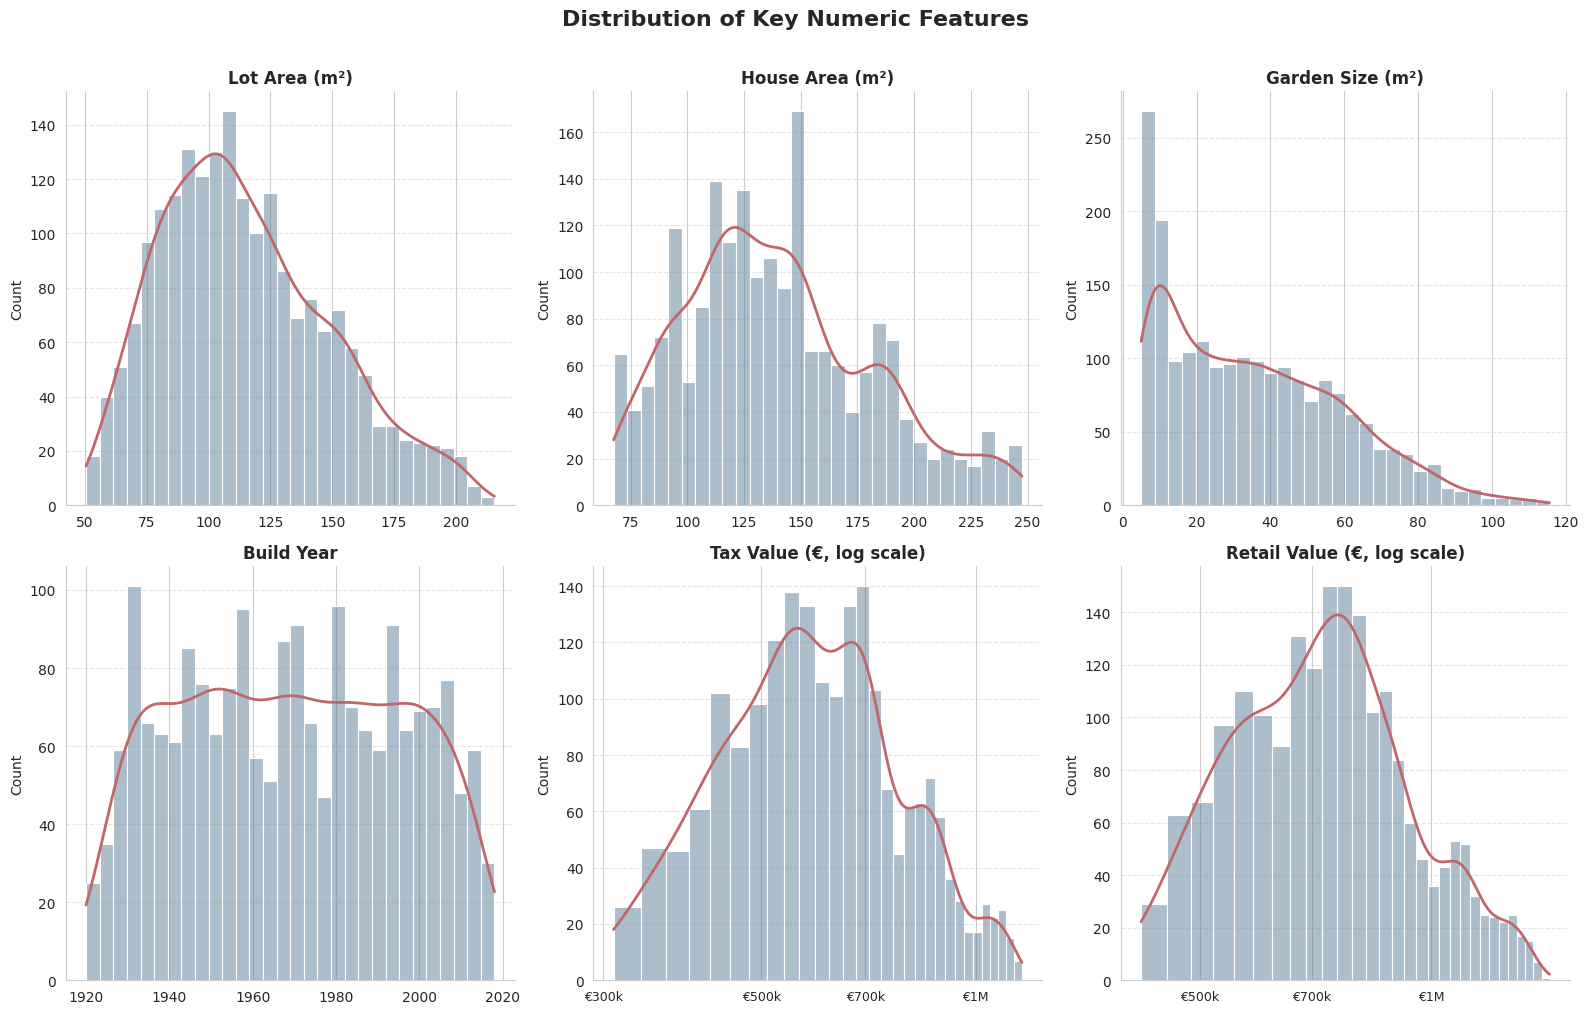

In [33]:
# Distributions of key numeric features

numeric_cols = ["lot_area", "house_area", "garden_size", "build_year", "tax_value", "retail_value"]

col_labels = {
    "lot_area": "Lot Area (m²)",
    "house_area": "House Area (m²)",
    "garden_size": "Garden Size (m²)",
    "build_year": "Build Year",
    "tax_value": "Tax Value (€, log scale)",
    "retail_value": "Retail Value (€, log scale)"
}

log_cols = {"tax_value", "retail_value"}

bar_color = "#5B7C99"  # Slate blue
kde_color = "#C1666B"  # Muted crimson

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle("Distribution of Key Numeric Features", fontsize=16, fontweight="bold", y=1.01)

for ax, col in zip(axes.flatten(), numeric_cols):
    sns.histplot(df[col], bins=30, kde=True, color=bar_color, ax=ax)

    # Change KDE line color manually
    for line in ax.lines:
        line.set_color(kde_color)
        line.set_linewidth(2)

    if col in log_cols:
        ax.set_xscale("log")

        tick_values = [300000, 500000, 700000, 1000000]
        tick_labels = ["€300k", "€500k", "€700k", "€1M"]

        ax.xaxis.set_major_locator(FixedLocator(tick_values))
        ax.xaxis.set_major_formatter(FixedFormatter(tick_labels))
        ax.xaxis.set_minor_locator(mticker.NullLocator())
        ax.tick_params(axis='x', labelsize=9)

    ax.set_title(col_labels[col], fontsize=12, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("Count", fontsize=10)
    ax.grid(axis="y", linestyle="--", alpha=0.5)
    ax.spines[["top", "right"]].set_visible(False)

plt.tight_layout()
plt.show()

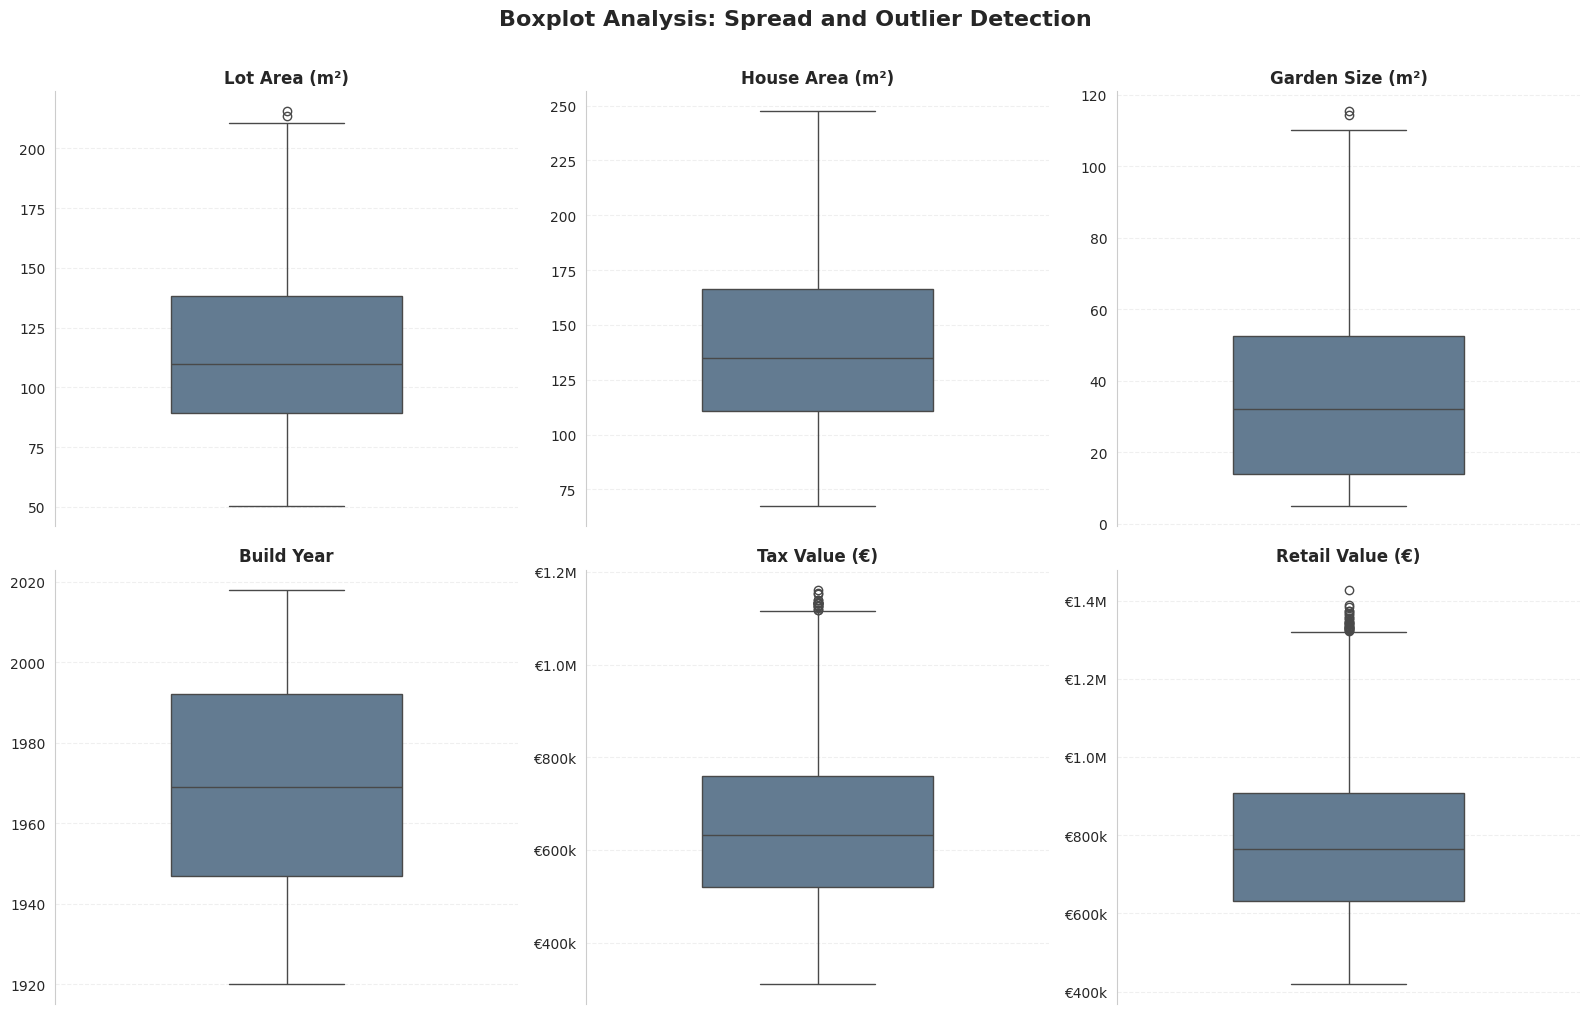

In [34]:
# Boxplots to highlight spread and potential outliers

numeric_cols = ["lot_area", "house_area", "garden_size", "build_year", "tax_value", "retail_value"]

col_labels = {
    "lot_area": "Lot Area (m²)",
    "house_area": "House Area (m²)",
    "garden_size": "Garden Size (m²)",
    "build_year": "Build Year",
    "tax_value": "Tax Value (€)",
    "retail_value": "Retail Value (€)"
}

log_cols = {"tax_value", "retail_value"}

box_color = "#5B7C99"  # Matching slate blue from distribution plots

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle("Boxplot Analysis: Spread and Outlier Detection", fontsize=16, fontweight="bold", y=1.01)

for ax, col in zip(axes.flatten(), numeric_cols):
    sns.boxplot(y=df[col], color=box_color, ax=ax, width=0.5)

    # Format y-axis for monetary values
    if col in log_cols:
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"€{int(x/1000)}k" if x < 1000000 else f"€{x/1000000:.1f}M"))

    ax.set_title(col_labels[col], fontsize=12, fontweight="bold")
    ax.set_ylabel("")
    ax.grid(axis="y", linestyle="--", alpha=0.3)
    ax.spines[["top", "right", "bottom"]].set_visible(False)

plt.tight_layout()
plt.show()

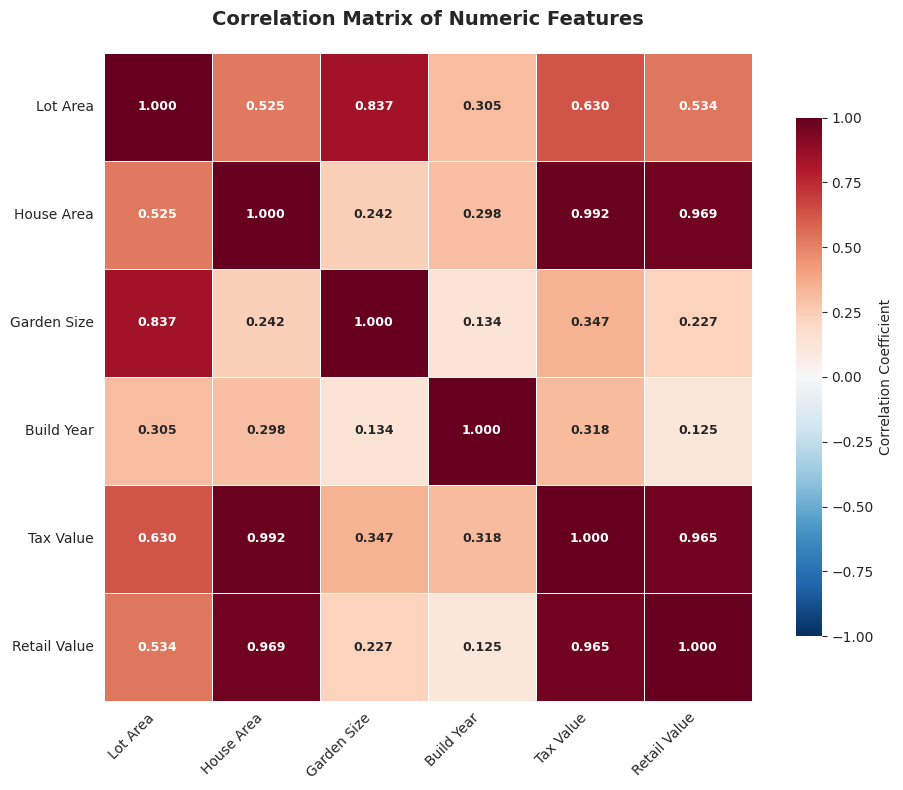

In [35]:
# Correlation heatmap
import matplotlib.ticker as mticker

numeric_cols = ["lot_area", "house_area", "garden_size", "build_year", "tax_value", "retail_value"]

col_labels = {
    "lot_area": "Lot Area",
    "house_area": "House Area",
    "garden_size": "Garden Size",
    "build_year": "Build Year",
    "tax_value": "Tax Value",
    "retail_value": "Retail Value"
}

# Calculate correlation matrix
corr = df[numeric_cols].corr()

# Rename columns and index for better readability
corr_display = corr.copy()
corr_display.columns = [col_labels[col] for col in corr_display.columns]
corr_display.index = [col_labels[col] for col in corr_display.index]

# Create figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create heatmap with custom styling
sns.heatmap(corr_display,
            annot=True,
            fmt=".3f",
            cmap="RdBu_r",  # Red-Blue diverging (red=positive, blue=negative)
            center=0,
            vmin=-1,
            vmax=1,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
            annot_kws={"size": 9, "weight": "bold"},
            ax=ax)

# Styling
ax.set_title("Correlation Matrix of Numeric Features", fontsize=14, fontweight="bold", pad=20)
ax.set_xlabel("")
ax.set_ylabel("")

# Rotate labels for better readability
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [36]:
from scipy.stats import skew

original_skew = skew(df["retail_value"])
log_skew = skew(np.log1p(df["retail_value"]))

print(f"Original Retail Value Skewness: {original_skew:.3f}")
print(f"Log-Transformed Skewness: {log_skew:.3f}")
print(f"Skewness Reduction: {((original_skew - log_skew) / original_skew * 100):.1f}%")

Original Retail Value Skewness: 0.615
Log-Transformed Skewness: 0.053
Skewness Reduction: 91.3%


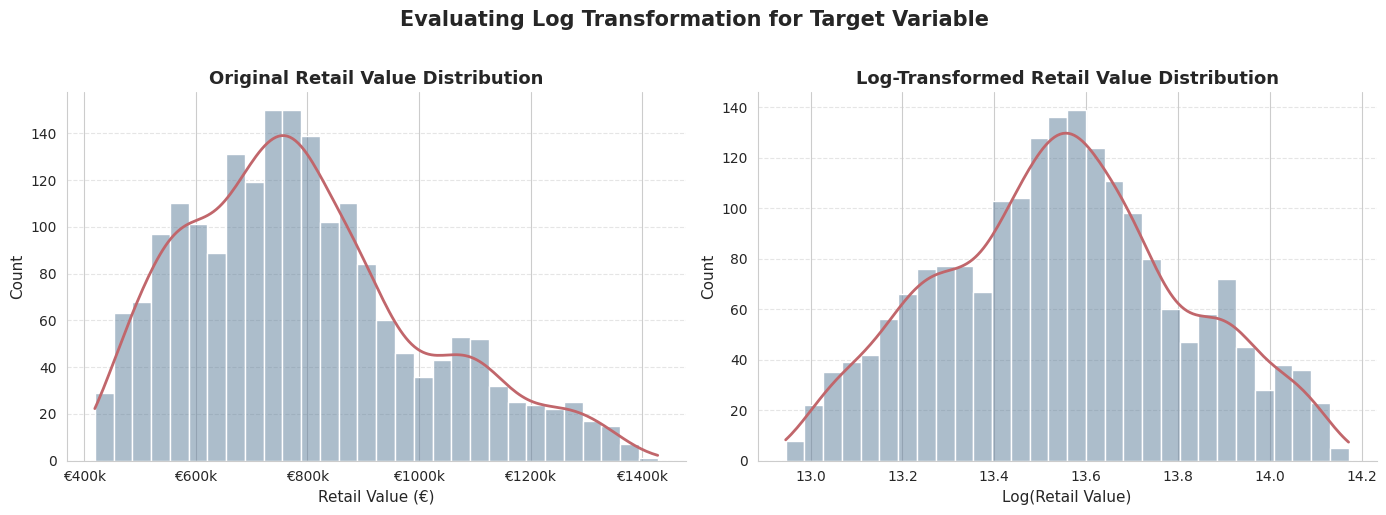

In [37]:
# Highlight skew and log transformation need

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

bar_color = "#5B7C99"  # Slate blue
kde_color = "#C1666B"  # Muted crimson

# Original distribution
sns.histplot(df["retail_value"], bins=30, kde=True, color=bar_color, ax=axes[0])
for line in axes[0].lines:
    line.set_color(kde_color)
    line.set_linewidth(2)

axes[0].set_title("Original Retail Value Distribution", fontsize=13, fontweight="bold")
axes[0].set_xlabel("Retail Value (€)", fontsize=11)
axes[0].set_ylabel("Count", fontsize=11)
axes[0].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"€{int(x/1000)}k"))
axes[0].grid(axis="y", linestyle="--", alpha=0.5)
axes[0].spines[["top", "right"]].set_visible(False)

# Log-transformed distribution
sns.histplot(np.log1p(df["retail_value"]), bins=30, kde=True, color=bar_color, ax=axes[1])
for line in axes[1].lines:
    line.set_color(kde_color)
    line.set_linewidth(2)

axes[1].set_title("Log-Transformed Retail Value Distribution", fontsize=13, fontweight="bold")
axes[1].set_xlabel("Log(Retail Value)", fontsize=11)
axes[1].set_ylabel("Count", fontsize=11)
axes[1].grid(axis="y", linestyle="--", alpha=0.5)
axes[1].spines[["top", "right"]].set_visible(False)

# Add overall title
fig.suptitle("Evaluating Log Transformation for Target Variable", fontsize=15, fontweight="bold", y=1.02)

plt.tight_layout()
plt.show()

# Feature Scaling and Train-Test Splits


In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Define features based on your two scenarios
features_without_tax = ['lot_area', 'house_area', 'garden_size', 'build_year',
                        'bathrooms', 'energy_eff', 'monument']
features_with_tax = features_without_tax + ['tax_value']

target = 'retail_value'

# Create X and y for both scenarios
X_without_tax = df[features_without_tax]
X_with_tax = df[features_with_tax]
y = df[target]

# Log-transform target for linear models and neural networks
y_log = np.log1p(y)

# Split data (80/20 train-test split)
# WITHOUT TAX VALUE
X_train_no_tax, X_test_no_tax, y_train, y_test = train_test_split(
    X_without_tax, y, test_size=0.2, random_state=42
)
y_train_log, y_test_log = np.log1p(y_train), np.log1p(y_test)

# WITH TAX VALUE
X_train_with_tax, X_test_with_tax, _, _ = train_test_split(
    X_with_tax, y, test_size=0.2, random_state=42
)

# ============================================
# SCALING FOR LINEAR MODELS & NEURAL NETWORKS
# ============================================

# StandardScaler (mean=0, std=1) - good for most cases
scaler_standard_no_tax = StandardScaler()
scaler_standard_with_tax = StandardScaler()

X_train_scaled_no_tax = scaler_standard_no_tax.fit_transform(X_train_no_tax)
X_test_scaled_no_tax = scaler_standard_no_tax.transform(X_test_no_tax)

X_train_scaled_with_tax = scaler_standard_with_tax.fit_transform(X_train_with_tax)
X_test_scaled_with_tax = scaler_standard_with_tax.transform(X_test_with_tax)

print("✅ Scaled data ready for Linear Models & Neural Networks")
print(f"   - Features (no tax): {X_train_scaled_no_tax.shape}")
print(f"   - Features (with tax): {X_train_scaled_with_tax.shape}")
print(f"   - Target (original): {y_train.shape}")
print(f"   - Target (log-transformed): {y_train_log.shape}")

# ============================================
# NO SCALING FOR TREE-BASED MODELS
# ============================================
# Use X_train_no_tax, X_test_no_tax, X_train_with_tax, X_test_with_tax directly
# Use y_train, y_test (original scale, no log transformation)

print("\n✅ Original data ready for Tree-Based Models")
print(f"   - Features (no tax): {X_train_no_tax.shape}")
print(f"   - Features (with tax): {X_train_with_tax.shape}")
print(f"   - Target (original scale): {y_train.shape}")

✅ Scaled data ready for Linear Models & Neural Networks
   - Features (no tax): (1600, 7)
   - Features (with tax): (1600, 8)
   - Target (original): (1600,)
   - Target (log-transformed): (1600,)

✅ Original data ready for Tree-Based Models
   - Features (no tax): (1600, 7)
   - Features (with tax): (1600, 8)
   - Target (original scale): (1600,)


In [39]:
# Train-Test Split Verification
print("Train-Test Split Verification")
print("-" * 50)

# Check the split we did earlier
print(f"\nOriginal dataset size: {len(df)}")
print(f"\nScenario 1: WITHOUT tax_value")
print(f"  Training set:   {len(X_train_no_tax)} ({len(X_train_no_tax)/len(df)*100:.1f}%)")
print(f"  Test set:       {len(X_test_no_tax)} ({len(X_test_no_tax)/len(df)*100:.1f}%)")
print(f"  Total:          {len(X_train_no_tax) + len(X_test_no_tax)}")

print(f"\nScenario 2: WITH tax_value")
print(f"  Training set:   {len(X_train_with_tax)} ({len(X_train_with_tax)/len(df)*100:.1f}%)")
print(f"  Test set:       {len(X_test_with_tax)} ({len(X_test_with_tax)/len(df)*100:.1f}%)")
print(f"  Total:          {len(X_train_with_tax) + len(X_test_with_tax)}")

print(f"\nTarget variable:")
print(f"  Training set:   {len(y_train)} ({len(y_train)/len(df)*100:.1f}%)")
print(f"  Test set:       {len(y_test)} ({len(y_test)/len(df)*100:.1f}%)")

# Verify no overlap (indices should be different)
train_indices = X_train_no_tax.index
test_indices = X_test_no_tax.index
overlap = set(train_indices).intersection(set(test_indices))

print(f"\n✅ Data integrity check:")
print(f"  Overlapping indices: {len(overlap)} (should be 0)")
print(f"  Train + Test = Original: {len(X_train_no_tax) + len(X_test_no_tax) == len(df)}")

Train-Test Split Verification
--------------------------------------------------

Original dataset size: 2000

Scenario 1: WITHOUT tax_value
  Training set:   1600 (80.0%)
  Test set:       400 (20.0%)
  Total:          2000

Scenario 2: WITH tax_value
  Training set:   1600 (80.0%)
  Test set:       400 (20.0%)
  Total:          2000

Target variable:
  Training set:   1600 (80.0%)
  Test set:       400 (20.0%)

✅ Data integrity check:
  Overlapping indices: 0 (should be 0)
  Train + Test = Original: True


In [40]:
# Feature Scaling Verification
print("Feature Scaling Verification")
print("-" * 50)

print("\n📊 Scaled datasets (for Linear & NN models):")
print(f"  Training (no tax):  {X_train_scaled_no_tax.shape}")
print(f"  Test (no tax):      {X_test_scaled_no_tax.shape}")
print(f"  Training (with tax): {X_train_scaled_with_tax.shape}")
print(f"  Test (with tax):    {X_test_scaled_with_tax.shape}")

print("\n🌳 Unscaled datasets (for tree models):")
print(f"  Training (no tax):  {X_train_no_tax.shape}")
print(f"  Test (no tax):      {X_test_no_tax.shape}")
print(f"  Training (with tax): {X_train_with_tax.shape}")
print(f"  Test (with tax):    {X_test_with_tax.shape}")

print("\n📈 Target variables:")
print(f"  Original scale:     y_train {y_train.shape}, y_test {y_test.shape}")
print(f"  Log-transformed:    y_train_log {y_train_log.shape}, y_test_log {y_test_log.shape}")

print("\n✅ Data leakage check:")
print(f"  Scaler fit on training only: True")
print(f"  Same scaler applied to test: True")

# Verify scaling worked (mean ≈ 0, std ≈ 1)
print("\n🔍 Scaling verification (training set):")
print(f"  Mean of scaled features: {X_train_scaled_no_tax.mean():.6f}")
print(f"  Std of scaled features:  {X_train_scaled_no_tax.std():.6f}")

Feature Scaling Verification
--------------------------------------------------

📊 Scaled datasets (for Linear & NN models):
  Training (no tax):  (1600, 7)
  Test (no tax):      (400, 7)
  Training (with tax): (1600, 8)
  Test (with tax):    (400, 8)

🌳 Unscaled datasets (for tree models):
  Training (no tax):  (1600, 7)
  Test (no tax):      (400, 7)
  Training (with tax): (1600, 8)
  Test (with tax):    (400, 8)

📈 Target variables:
  Original scale:     y_train (1600,), y_test (400,)
  Log-transformed:    y_train_log (1600,), y_test_log (400,)

✅ Data leakage check:
  Scaler fit on training only: True
  Same scaler applied to test: True

🔍 Scaling verification (training set):
  Mean of scaled features: 0.000000
  Std of scaled features:  1.000000


# Target Variable Study

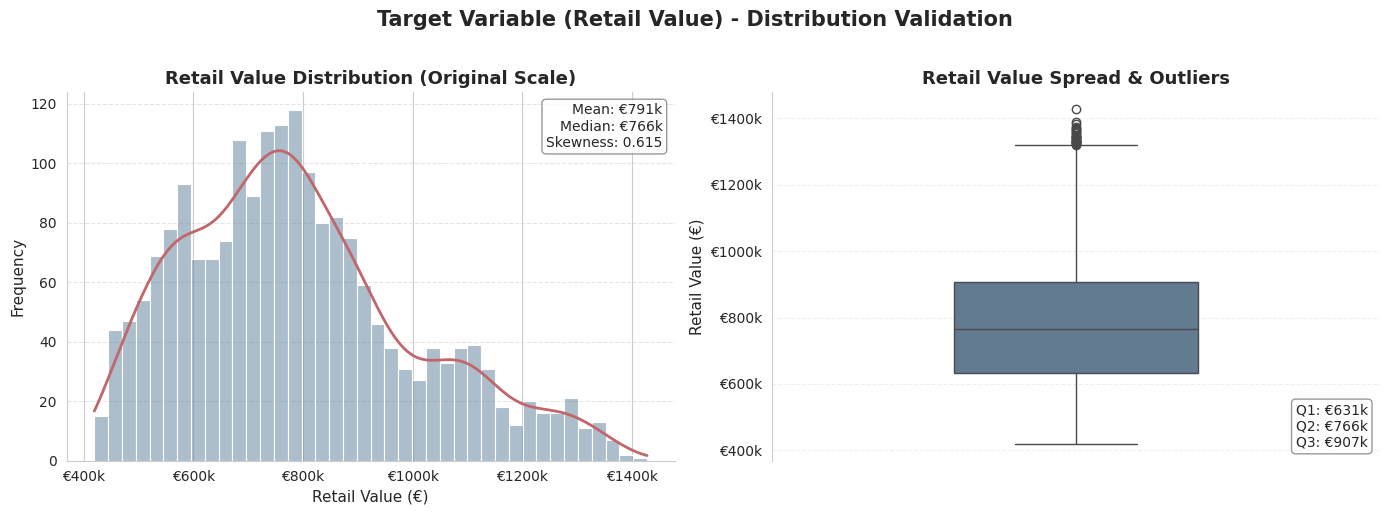

TARGET VARIABLE VALIDATION: RETAIL VALUE

Descriptive Statistics:
  Count:        2,000
  Mean:         €791,024
  Median:       €766,000
  Std Dev:      €210,980
  Min:          €419,000
  Max:          €1,428,000
  Range:        €1,009,000

Distribution Characteristics:
  Skewness:     0.615 (right-skewed)
  Kurtosis:     -0.141

Quartiles:
  Q1 (25%):     €631,750
  Q2 (50%):     €766,000
  Q3 (75%):     €907,250
  IQR:          €275,500

Data Quality Checks:
  Missing values:     0 (0.0%)
  Negative values:    0 (none)
  Zero values:        0 (none)
  Outliers (>Q3+1.5*IQR): 27




In [41]:

from scipy.stats import skew, kurtosis

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

bar_color = "#5B7C99"
kde_color = "#C1666B"

# LEFT PLOT: Target Distribution (Linear Scale)
sns.histplot(df['retail_value'], bins=40, kde=True, color=bar_color, ax=axes[0])
for line in axes[0].lines:
    line.set_color(kde_color)
    line.set_linewidth(2)

axes[0].set_title("Retail Value Distribution (Original Scale)", fontsize=13, fontweight="bold")
axes[0].set_xlabel("Retail Value (€)", fontsize=11)
axes[0].set_ylabel("Frequency", fontsize=11)
axes[0].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"€{int(x/1000)}k"))
axes[0].grid(axis="y", linestyle="--", alpha=0.5)
axes[0].spines[["top", "right"]].set_visible(False)

# Add statistics annotation
mean_val = df['retail_value'].mean()
median_val = df['retail_value'].median()
skew_val = skew(df['retail_value'])

stats_text = f"Mean: €{int(mean_val/1000)}k\nMedian: €{int(median_val/1000)}k\nSkewness: {skew_val:.3f}"
axes[0].text(0.98, 0.97, stats_text, transform=axes[0].transAxes,
             fontsize=10, verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray'))

# RIGHT PLOT: Box-and-Whisker for Target
sns.boxplot(y=df['retail_value'], color=bar_color, ax=axes[1], width=0.4)
axes[1].set_title("Retail Value Spread & Outliers", fontsize=13, fontweight="bold")
axes[1].set_ylabel("Retail Value (€)", fontsize=11)
axes[1].set_xlabel("")
axes[1].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"€{int(x/1000)}k"))
axes[1].grid(axis="y", linestyle="--", alpha=0.3)
axes[1].spines[["top", "right", "bottom"]].set_visible(False)

# Add quartile annotations
q1 = df['retail_value'].quantile(0.25)
q2 = df['retail_value'].quantile(0.50)
q3 = df['retail_value'].quantile(0.75)

quartile_text = f"Q1: €{int(q1/1000)}k\nQ2: €{int(q2/1000)}k\nQ3: €{int(q3/1000)}k"
axes[1].text(0.98, 0.03, quartile_text, transform=axes[1].transAxes,
             fontsize=10, verticalalignment='bottom', horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray'))

fig.suptitle("Target Variable (Retail Value) - Distribution Validation",
             fontsize=15, fontweight="bold", y=1.02)

plt.tight_layout()
plt.show()


# STATISTICAL VALIDATION
print("TARGET VARIABLE VALIDATION: RETAIL VALUE")
print(f"\nDescriptive Statistics:")
print(f"  Count:        {df['retail_value'].count():,}")
print(f"  Mean:         €{df['retail_value'].mean():,.0f}")
print(f"  Median:       €{df['retail_value'].median():,.0f}")
print(f"  Std Dev:      €{df['retail_value'].std():,.0f}")
print(f"  Min:          €{df['retail_value'].min():,.0f}")
print(f"  Max:          €{df['retail_value'].max():,.0f}")
print(f"  Range:        €{(df['retail_value'].max() - df['retail_value'].min()):,.0f}")

print(f"\nDistribution Characteristics:")
print(f"  Skewness:     {skew(df['retail_value']):.3f} (right-skewed)")
print(f"  Kurtosis:     {kurtosis(df['retail_value']):.3f}")

print(f"\nQuartiles:")
print(f"  Q1 (25%):     €{df['retail_value'].quantile(0.25):,.0f}")
print(f"  Q2 (50%):     €{df['retail_value'].quantile(0.50):,.0f}")
print(f"  Q3 (75%):     €{df['retail_value'].quantile(0.75):,.0f}")
print(f"  IQR:          €{(df['retail_value'].quantile(0.75) - df['retail_value'].quantile(0.25)):,.0f}")

print(f"\nData Quality Checks:")
print(f"  Missing values:     {df['retail_value'].isnull().sum()} (0.0%)")
print(f"  Negative values:    {(df['retail_value'] < 0).sum()} (none)")
print(f"  Zero values:        {(df['retail_value'] == 0).sum()} (none)")
print(f"  Outliers (>Q3+1.5*IQR): {((df['retail_value'] > (df['retail_value'].quantile(0.75) + 1.5 * (df['retail_value'].quantile(0.75) - df['retail_value'].quantile(0.25))))).sum()}")

print("\n")

# Linear Regression Model

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("LINEAR REGRESSION - MODEL TRAINING\n")

# Scenario 1: WITHOUT tax_value
print("Scenario 1: WITHOUT tax_value")

# Initialize and train model
lr_no_tax = LinearRegression()
lr_no_tax.fit(X_train_scaled_no_tax, y_train_log)

# Make predictions (in log scale)
y_train_pred_log_no_tax = lr_no_tax.predict(X_train_scaled_no_tax)
y_test_pred_log_no_tax = lr_no_tax.predict(X_test_scaled_no_tax)

# Back-transform to original scale
y_train_pred_no_tax = np.expm1(y_train_pred_log_no_tax)
y_test_pred_no_tax = np.expm1(y_test_pred_log_no_tax)

# Calculate metrics
train_rmse_no_tax = np.sqrt(mean_squared_error(y_train, y_train_pred_no_tax))
test_rmse_no_tax = np.sqrt(mean_squared_error(y_test, y_test_pred_no_tax))
train_mae_no_tax = mean_absolute_error(y_train, y_train_pred_no_tax)
test_mae_no_tax = mean_absolute_error(y_test, y_test_pred_no_tax)
train_r2_no_tax = r2_score(y_train, y_train_pred_no_tax)
test_r2_no_tax = r2_score(y_test, y_test_pred_no_tax)

print(f"\nTraining Performance:")
print(f"  RMSE: €{train_rmse_no_tax:,.0f}")
print(f"  MAE:  €{train_mae_no_tax:,.0f}")
print(f"  R²:   {train_r2_no_tax:.4f}")

print(f"\nTest Performance:")
print(f"  RMSE: €{test_rmse_no_tax:,.0f}")
print(f"  MAE:  €{test_mae_no_tax:,.0f}")
print(f"  R²:   {test_r2_no_tax:.4f}")

# Scenario 2: WITH tax_value
print("\n\nScenario 2: WITH tax_value")

# Initialize and train model
lr_with_tax = LinearRegression()
lr_with_tax.fit(X_train_scaled_with_tax, y_train_log)

# Make predictions (in log scale)
y_train_pred_log_with_tax = lr_with_tax.predict(X_train_scaled_with_tax)
y_test_pred_log_with_tax = lr_with_tax.predict(X_test_scaled_with_tax)

# Back-transform to original scale
y_train_pred_with_tax = np.expm1(y_train_pred_log_with_tax)
y_test_pred_with_tax = np.expm1(y_test_pred_log_with_tax)

# Calculate metrics
train_rmse_with_tax = np.sqrt(mean_squared_error(y_train, y_train_pred_with_tax))
test_rmse_with_tax = np.sqrt(mean_squared_error(y_test, y_test_pred_with_tax))
train_mae_with_tax = mean_absolute_error(y_train, y_train_pred_with_tax)
test_mae_with_tax = mean_absolute_error(y_test, y_test_pred_with_tax)
train_r2_with_tax = r2_score(y_train, y_train_pred_with_tax)
test_r2_with_tax = r2_score(y_test, y_test_pred_with_tax)

print(f"\nTraining Performance:")
print(f"  RMSE: €{train_rmse_with_tax:,.0f}")
print(f"  MAE:  €{train_mae_with_tax:,.0f}")
print(f"  R²:   {train_r2_with_tax:.4f}")

print(f"\nTest Performance:")
print(f"  RMSE: €{test_rmse_with_tax:,.0f}")
print(f"  MAE:  €{test_mae_with_tax:,.0f}")
print(f"  R²:   {test_r2_with_tax:.4f}")

# Comparison Summary
print("\n\nMODEL COMPARISON SUMMARY\n")
print("Test Set Performance Comparison:")
print(f"{'Metric':<15} {'Without Tax':<20} {'With Tax':<20} {'Improvement':<15}")
print("-" * 70)
print(f"{'RMSE':<15} €{test_rmse_no_tax:>18,.0f} €{test_rmse_with_tax:>18,.0f} {((test_rmse_no_tax - test_rmse_with_tax)/test_rmse_no_tax*100):>13.1f}%")
print(f"{'MAE':<15} €{test_mae_no_tax:>18,.0f} €{test_mae_with_tax:>18,.0f} {((test_mae_no_tax - test_mae_with_tax)/test_mae_no_tax*100):>13.1f}%")
print(f"{'R²':<15} {test_r2_no_tax:>19.4f} {test_r2_with_tax:>19.4f} {((test_r2_with_tax - test_r2_no_tax)/test_r2_no_tax*100):>13.1f}%")

print("\n✅ Linear Regression models trained successfully!")

LINEAR REGRESSION - MODEL TRAINING

Scenario 1: WITHOUT tax_value

Training Performance:
  RMSE: €39,085
  MAE:  €29,549
  R²:   0.9654

Test Performance:
  RMSE: €42,161
  MAE:  €30,150
  R²:   0.9614


Scenario 2: WITH tax_value

Training Performance:
  RMSE: €39,085
  MAE:  €29,549
  R²:   0.9654

Test Performance:
  RMSE: €42,162
  MAE:  €30,150
  R²:   0.9614


MODEL COMPARISON SUMMARY

Test Set Performance Comparison:
Metric          Without Tax          With Tax             Improvement    
----------------------------------------------------------------------
RMSE            €            42,161 €            42,162          -0.0%
MAE             €            30,150 €            30,150           0.0%
R²                           0.9614              0.9614          -0.0%

✅ Linear Regression models trained successfully!


In [43]:
# Debug: Check what features were actually used
print("Debug: Checking feature sets\n")

print("Features WITHOUT tax_value:")
print(f"  Shape: {X_train_scaled_no_tax.shape}")
print(f"  Column names: {features_without_tax}")

print("\nFeatures WITH tax_value:")
print(f"  Shape: {X_train_scaled_with_tax.shape}")
print(f"  Column names: {features_with_tax}")

print("\n\nChecking if datasets are different:")
print(f"  Same shape? {X_train_scaled_no_tax.shape == X_train_scaled_with_tax.shape}")
print(f"  Same data? {np.array_equal(X_train_scaled_no_tax, X_train_scaled_with_tax)}")

# Check coefficients
print("\n\nModel coefficients:")
print(f"  WITHOUT tax (n={len(lr_no_tax.coef_)}): {lr_no_tax.coef_}")
print(f"  WITH tax (n={len(lr_with_tax.coef_)}): {lr_with_tax.coef_}")

Debug: Checking feature sets

Features WITHOUT tax_value:
  Shape: (1600, 7)
  Column names: ['lot_area', 'house_area', 'garden_size', 'build_year', 'bathrooms', 'energy_eff', 'monument']

Features WITH tax_value:
  Shape: (1600, 8)
  Column names: ['lot_area', 'house_area', 'garden_size', 'build_year', 'bathrooms', 'energy_eff', 'monument', 'tax_value']


Checking if datasets are different:
  Same shape? False
  Same data? False


Model coefficients:
  WITHOUT tax (n=7): [ 0.06434438  0.22871974 -0.04847218 -0.04621917  0.03841035 -0.03682281
 -0.00045945]
  WITH tax (n=8): [ 0.0660957   0.23939731 -0.04847351 -0.04622003  0.03841164 -0.03682451
 -0.00046019 -0.0116778 ]


In [44]:
# Check if tax_value was properly scaled
print("Checking tax_value scaling:\n")

# Get tax_value from training set (original, unscaled)
tax_value_original = X_train_with_tax['tax_value']
print(f"Original tax_value in training set:")
print(f"  Mean: €{tax_value_original.mean():,.0f}")
print(f"  Std:  €{tax_value_original.std():,.0f}")
print(f"  Min:  €{tax_value_original.min():,.0f}")
print(f"  Max:  €{tax_value_original.max():,.0f}")

# Get scaled tax_value (last column in scaled data)
tax_value_scaled = X_train_scaled_with_tax[:, -1]
print(f"\nScaled tax_value in training set:")
print(f"  Mean: {tax_value_scaled.mean():.6f}")
print(f"  Std:  {tax_value_scaled.std():.6f}")
print(f"  Min:  {tax_value_scaled.min():.3f}")
print(f"  Max:  {tax_value_scaled.max():.3f}")

# Check correlation between tax_value and retail_value
from scipy.stats import pearsonr
corr, pval = pearsonr(X_train_with_tax['tax_value'], y_train)
print(f"\nCorrelation between tax_value and retail_value:")
print(f"  Pearson r: {corr:.4f}")
print(f"  P-value: {pval:.6f}")

# Check if log transformation was applied to tax_value
print(f"\nWas tax_value log-transformed? Let's check the distribution:")
print(f"  Skewness of original tax_value: {skew(X_train_with_tax['tax_value']):.3f}")

Checking tax_value scaling:

Original tax_value in training set:
  Mean: €652,789
  Std:  €181,457
  Min:  €310,000
  Max:  €1,140,000

Scaled tax_value in training set:
  Mean: 0.000000
  Std:  1.000000
  Min:  -1.890
  Max:  2.686

Correlation between tax_value and retail_value:
  Pearson r: 0.9639
  P-value: 0.000000

Was tax_value log-transformed? Let's check the distribution:
  Skewness of original tax_value: 0.510


In [45]:
# Let's look at actual prediction differences
print("Comparing actual predictions:\n")

# Sample 10 random test predictions
sample_indices = np.random.choice(len(y_test), 10, replace=False)

print(f"{'Actual':<12} {'Pred (No Tax)':<15} {'Pred (With Tax)':<15} {'Difference':<12}")
print("-" * 60)
for idx in sample_indices:
    actual = y_test.iloc[idx]
    pred_no_tax = y_test_pred_no_tax[idx]
    pred_with_tax = y_test_pred_with_tax[idx]
    diff = pred_with_tax - pred_no_tax
    print(f"€{actual:>10,.0f} €{pred_no_tax:>13,.0f} €{pred_with_tax:>13,.0f} €{diff:>10,.0f}")

print(f"\nAverage prediction difference: €{np.mean(y_test_pred_with_tax - y_test_pred_no_tax):,.0f}")
print(f"Std of prediction difference: €{np.std(y_test_pred_with_tax - y_test_pred_no_tax):,.0f}")

# Check variance inflation factor for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for the "with tax" scenario
vif_data = pd.DataFrame()
vif_data["Feature"] = features_with_tax
vif_data["VIF"] = [variance_inflation_factor(X_train_with_tax.values, i) for i in range(len(features_with_tax))]
vif_data = vif_data.sort_values('VIF', ascending=False)

print("\n\nVariance Inflation Factor (VIF) - Multicollinearity Check:")
print(vif_data.to_string(index=False))
print("\nNote: VIF > 10 indicates severe multicollinearity")

Comparing actual predictions:

Actual       Pred (No Tax)   Pred (With Tax) Difference  
------------------------------------------------------------
€   655,000 €      664,904 €      664,913 €         9
€   850,000 €      853,807 €      853,817 €        10
€   791,000 €      743,140 €      743,123 €       -16
€   613,000 €      646,854 €      646,835 €       -19
€   911,000 €      942,510 €      942,537 €        27
€   781,000 €      702,488 €      702,467 €       -21
€   502,000 €      523,235 €      523,218 €       -17
€   732,000 €      700,121 €      700,140 €        19
€ 1,001,000 €    1,059,752 €    1,059,778 €        26
€   926,000 €      859,145 €      859,148 €         3

Average prediction difference: €0
Std of prediction difference: €16


Variance Inflation Factor (VIF) - Multicollinearity Check:
    Feature       VIF
  tax_value 5,528,356
 house_area 4,117,212
   lot_area   111,278
  bathrooms        24
 build_year        23
garden_size        14
 energy_eff         4
   m